## SIT-789 Task-7.1P

Section-1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from pydub.utils import mediainfo

c:\tools\python\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
speech = AudioSegment.from_wav('arctic_a0005.wav') # Read audio data from file
x = speech.get_array_of_samples() # samples x(t)
x_sr = speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
print('Sampling rate: ', x_sr)
print('Number of samples: ', len(x))

Sampling rate:  16000
Number of samples:  22640


In [3]:
duration = librosa.get_duration(filename = 'arctic_a0005.wav')
n_samples = duration * x_sr
print('duration: ', duration)
print('n_samples: ', n_samples)

duration:  1.415
n_samples:  22640.0


Text(0, 0.5, 'Amplitude')

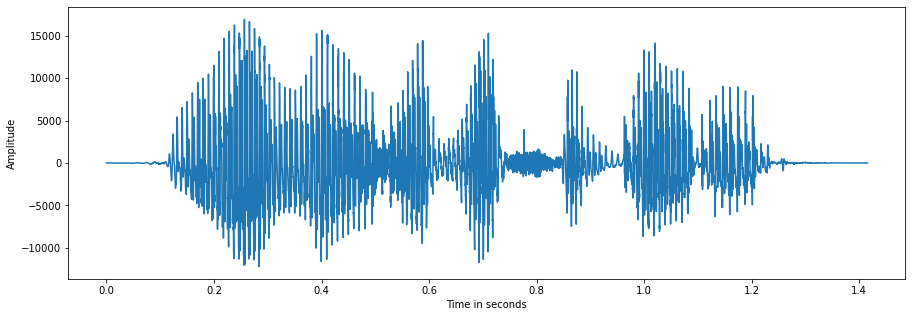

In [4]:
x_range = np.linspace(0, duration, len(x))
plt.figure(figsize = (15, 5))
plt.plot(x_range, x)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')

In [5]:
mid_point = int(len(x) / 2)
x1 = x[0:mid_point]
x2 = x[mid_point:len(x)]

x1_audio = AudioSegment(
                        #raw data
                        data = x1,
                        #2 bytes = 16 bit samples
                        sample_width = 2,
                        #frame rate
                        frame_rate = x_sr,
                        #channels = 1 for mono and 2 for stereo
                        channels = 1)

x2_audio = AudioSegment(
                        #raw data
                        data = x2,
                        #2 bytes = 16 bit samples
                        sample_width = 2,
                        #frame rate
                        frame_rate = x_sr,
                        #channels = 1 for mono and 2 for stereo
                        channels = 1)

x1_audio.export('arctic_a0005_1.wav', format = 'wav')
x2_audio.export('arctic_a0005_2.wav', format = 'wav')

<_io.BufferedRandom name='arctic_a0005_2.wav'>

Sampling rate:  16000
Number of samples:  11320
duration:  0.7075
n_samples:  11320.0


Text(0, 0.5, 'Amplitude')

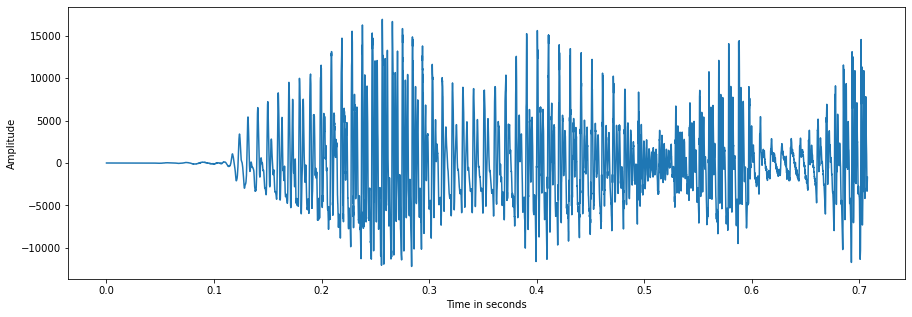

In [6]:
x1_array = x1_audio.get_array_of_samples() # samples x(t)
x1_sr = x1_audio.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
print('Sampling rate: ', x1_sr)
print('Number of samples: ', len(x1_array))

duration_1 = librosa.get_duration(filename = 'arctic_a0005_1.wav')
n_samples_1 = duration_1 * x1_sr
print('duration: ', duration_1)
print('n_samples: ', n_samples_1)

x_range = np.linspace(0, duration_1, len(x1_array))
plt.figure(figsize = (15, 5))
plt.plot(x_range, x1_array)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')

Sampling rate:  16000
Number of samples:  11320
duration:  0.7075
n_samples:  11320.0


Text(0, 0.5, 'Amplitude')

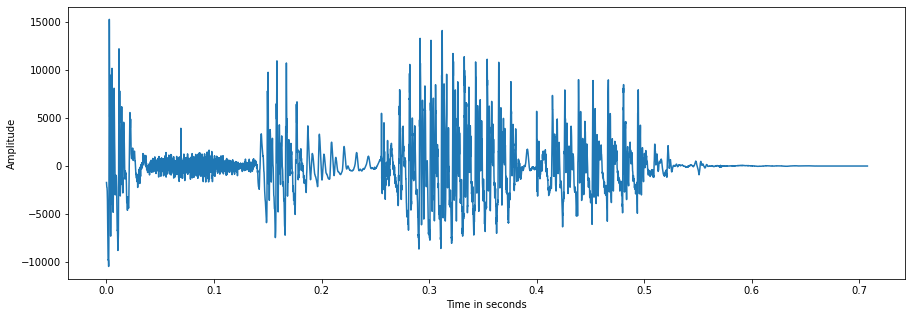

In [7]:
x2_array = x2_audio.get_array_of_samples() # samples x(t)
x2_sr = x2_audio.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
print('Sampling rate: ', x2_sr)
print('Number of samples: ', len(x2_array))

duration_2 = librosa.get_duration(filename = 'arctic_a0005_2.wav')
n_samples_2 = duration_2 * x2_sr
print('duration: ', duration_1)
print('n_samples: ', n_samples_1)

x_range = np.linspace(0, duration_2, len(x2_array))
plt.figure(figsize = (15, 5))
plt.plot(x_range, x2_array)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')

Section-2

In [8]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 1024

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(x_sr * 0.03)

#number of samples between tww consecutive frames
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

#bydefault, hop_length = win_length / 4
X = librosa.stft(np.float32(x),
                    n_fft = freq_range,
                    window = window,
                    hop_length = hop_length,
                    win_length = win_length
                )

In [9]:
print(X.shape)

(513, 95)


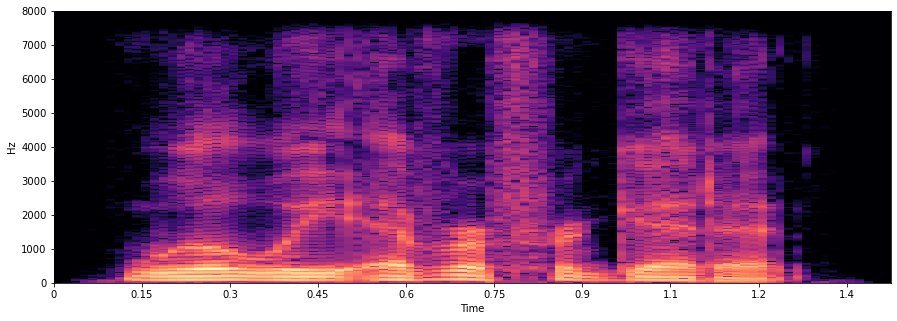

In [10]:
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X))

librosa.display.specshow(
                            #spectrogram
                            Xdb,

                            #sampling rate
                            sr = x_sr,
                            
                            #label for horizontal axis
                            x_axis = 'time',
    
                            #presentation scale
                            y_axis = 'linear',
    
                            #hop_lenght
                            hop_length = hop_length
                        )

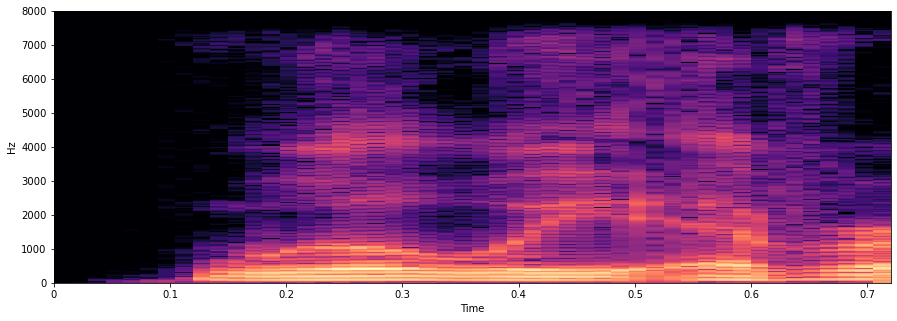

In [11]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 1024

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(x1_sr * 0.03)

#number of samples between tww consecutive frames
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

#bydefault, hop_length = win_length / 4
X1 = librosa.stft(np.float32(x1_array),
                    n_fft = freq_range,
                    window = window,
                    hop_length = hop_length,
                    win_length = win_length
                )

plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb_1 = librosa.amplitude_to_db(abs(X1))

librosa.display.specshow(
                            #spectrogram
                            Xdb_1,

                            #sampling rate
                            sr = x1_sr,
                            
                            #label for horizontal axis
                            x_axis = 'time',
    
                            #presentation scale
                            y_axis = 'linear',
    
                            #hop_lenght
                            hop_length = hop_length
                        )

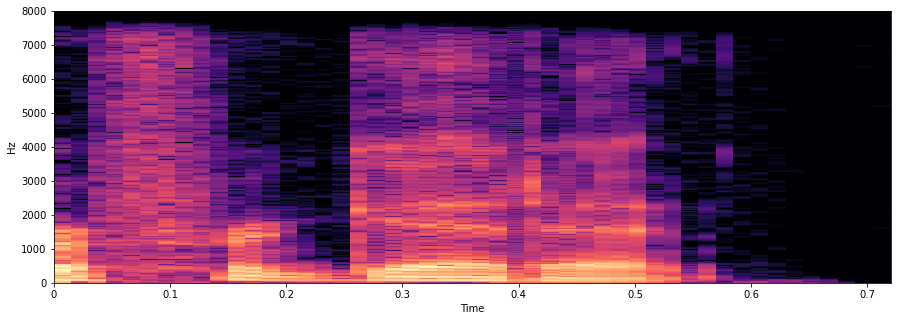

In [12]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 1024

#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(x2_sr * 0.03)

#number of samples between tww consecutive frames
hop_length = int(win_length / 2)

#windowing technique
window = 'hann'

#bydefault, hop_length = win_length / 4
X2 = librosa.stft(np.float32(x2_array),
                    n_fft = freq_range,
                    window = window,
                    hop_length = hop_length,
                    win_length = win_length
                )

plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb_2 = librosa.amplitude_to_db(abs(X2))

librosa.display.specshow(
                            #spectrogram
                            Xdb_2,

                            #sampling rate
                            sr = x2_sr,
                            
                            #label for horizontal axis
                            x_axis = 'time',
    
                            #presentation scale
                            y_axis = 'linear',
    
                            #hop_lenght
                            hop_length = hop_length
                        )

In [13]:
#number of samples
N = 600
#sample spacing
T = 1.0 / 800.0
t = np.linspace(0.0, N*T, N)
s1 = np.sin(50.0 * 2.0 * np.pi * t)
s2 = 0.5 * np.sin(80.0 * 2.0 * np.pi * t)
s = s1 + s2

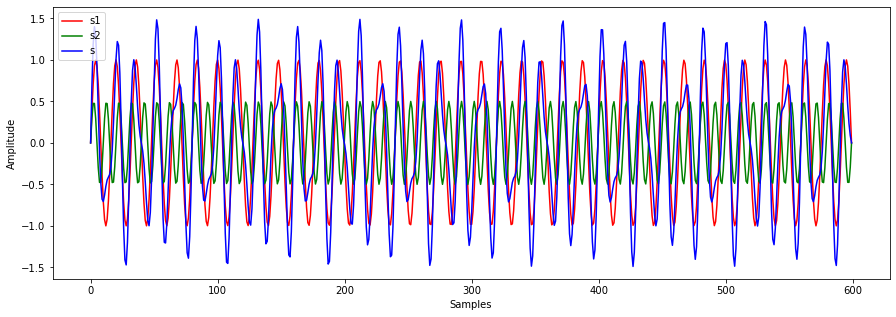

In [14]:
plt.figure(figsize = (15, 5))
plt.plot(s1, label = 's1', color = 'r')
plt.plot(s2, label = 's2', color = 'g')
plt.plot(s, label = 's', color = 'b')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend(loc = "upper left")

c:\tools\python\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=600
  n_fft, y.shape[-1]


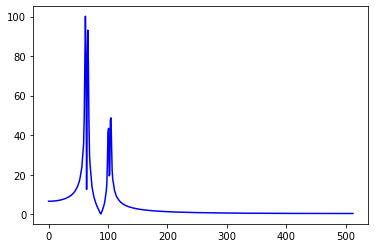

In [15]:
S = librosa.stft(s, n_fft = 1024, window = 'hann', hop_length = N, win_length = N)
S_0 = S[:, 0]
mag_S_0 = np.abs(S_0)
plt.plot(mag_S_0, color = 'b')

c:\tools\python\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=600
  n_fft, y.shape[-1]


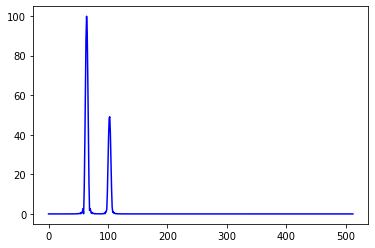

In [16]:
#we define a window length m with less number of samples
m = 400
S = librosa.stft(s, n_fft = 1024, window = 'hann', hop_length = int(m / 2), win_length = m)
#we take S_1, which is an intermediate frame.
S_1 = S[:, 1]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')

c:\tools\python\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=600
  n_fft, y.shape[-1]


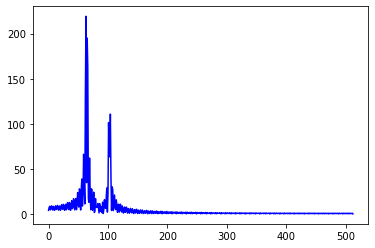

In [19]:
S = librosa.stft(s, n_fft = 1024, window = 'boxcar', hop_length = N, win_length = N)
S_0 = S[:, 0]
mag_S_0 = np.abs(S_0)
plt.plot(mag_S_0, color = 'b')

c:\tools\python\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=600
  n_fft, y.shape[-1]


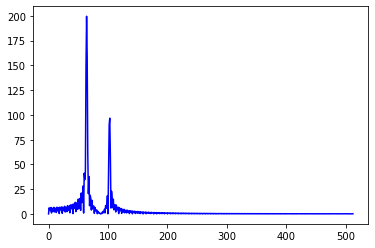

In [17]:
#we define a window length m with less number of samples
m = 400
S = librosa.stft(s, n_fft = 1024, window = 'boxcar', hop_length = int(m / 2), win_length = m)
#we take S_1, which is an intermediate frame.
S_1 = S[:, 1]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')

c:\tools\python\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=600
  n_fft, y.shape[-1]


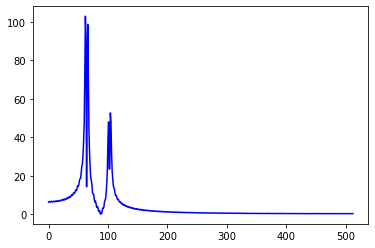

In [20]:
S = librosa.stft(s, n_fft = 1024, window = 'hamming', hop_length = N, win_length = N)
S_0 = S[:, 0]
mag_S_0 = np.abs(S_0)
plt.plot(mag_S_0, color = 'b')

c:\tools\python\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=600
  n_fft, y.shape[-1]


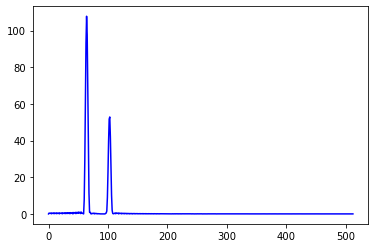

In [18]:
#we define a window length m with less number of samples
m = 400
S = librosa.stft(s, n_fft = 1024, window = 'hamming', hop_length = int(m / 2), win_length = m)
#we take S_1, which is an intermediate frame.
S_1 = S[:, 1]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')